<a href="https://colab.research.google.com/github/DarielAngel/CP-Algorithms-es.github.io/blob/main/Algoritmo%20de%20Optimizaci%C3%B3n%20para%20Machirne%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intersección con eje Y (b): 0.00
Pendiente (m): 2.10
Suma de cuadrados de los residuos (RSS): 31.42


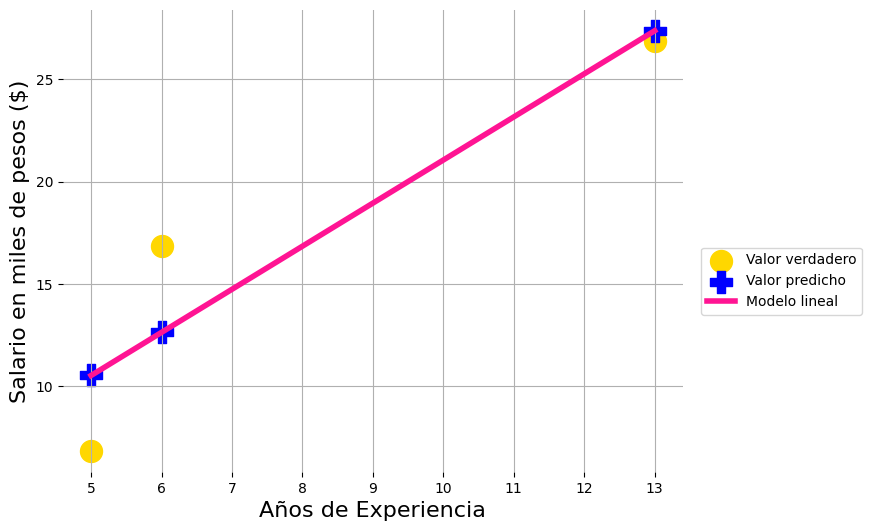

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

# Variable independiente
experiencia = np.array([[5], [6], [13]])

# Variable objetivo
salario = np.array([6.85, 16.83, 26.84])

# Modelo Lineall creado con el método de mínimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1), salario)

#Visualización de datos y modelos
print("Intersección con eje Y (b): %0.2f" % modelo.intercept_)
print("Pendiente (m): %0.2f" % modelo.coef_[0])
print("Suma de cuadrados de los residuos (RSS): %0.2f" % ((salario - modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8, 6))

plt.scatter(experiencia, salario, color="gold", s=250, marker="o", label="Valor verdadero")

plt.scatter(experiencia, modelo.predict(experiencia), color="blue", s=250, marker="P", label="Valor predicho")

plt.plot(experiencia, modelo.predict(experiencia), linewidth=4, color="deeppink", label="Modelo lineal")

experiencia = experiencia.reshape(3)

plt.ylabel("Salario en miles de pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

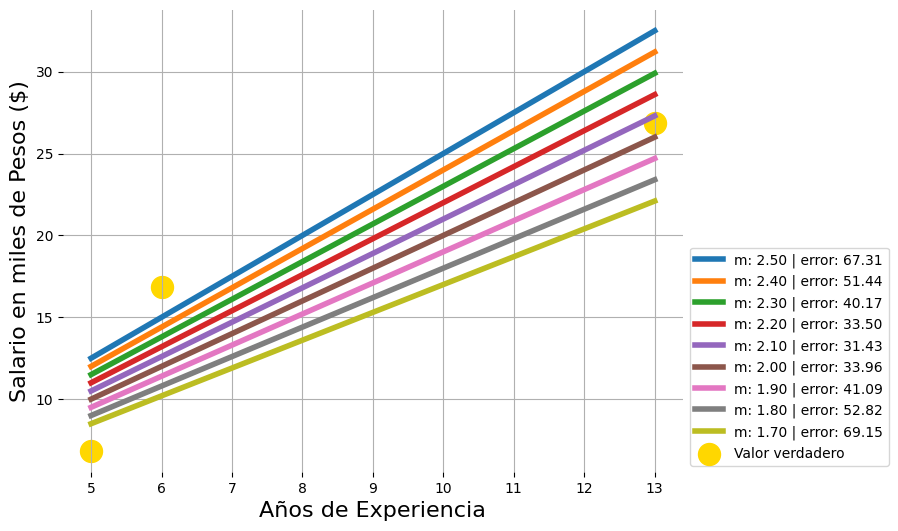

In [5]:
# Creación de múltoples pendientes para exploración
pendientes = np.arange(2.5, 1.6, -0.1)

# Vector para almacenar el error de los diferentes modelos
errores = np.array([])

#Visualización de modelos

plt.figure(figsize=(8, 6))

for pendiente in pendientes:
    # Error del modelo (suma de cuadrados de los residuos)
    error = ((pendiente*experiencia - salario)**2).sum()

    # Visualización de un modelo para una pendiente dada
    plt.plot(experiencia, pendiente*experiencia, linewidth=4, label="m: %0.2f | error: %0.2f" % (pendiente, error))

    errores = np.append(errores, error)

plt.scatter(experiencia, salario, color="gold", s=250, marker="o", label="Valor verdadero")

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.box(False)
plt.show()

Función de error a ser Minimizada

In [6]:
# persona1: (6.85, 5) persona2: (16.83, 6) persona3: (26.84, 13)

m = sym.Symbol("m")

# Función de error

error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 - m*13)**2

# Derivada de la función de error

derivada = sym.diff(error, m)

for pendiente in pendientes:
  print(derivada, "Evaluación %0.2f" % derivada.evalf(subs={m : pendiente}))

460.0*m - 968.3 Evaluación 181.70
460.0*m - 968.3 Evaluación 135.70
460.0*m - 968.3 Evaluación 89.70
460.0*m - 968.3 Evaluación 43.70
460.0*m - 968.3 Evaluación -2.30
460.0*m - 968.3 Evaluación -48.30
460.0*m - 968.3 Evaluación -94.30
460.0*m - 968.3 Evaluación -140.30
460.0*m - 968.3 Evaluación -186.30


Función de Error (m, b)

In [10]:
def error_RSS(m, b):
    return (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

# Generación de rejilla (pendientes, interceptos, errores)

puntos = np.zeros(shape=(400,3))
i = 0
for pendiente in np.arange(0, 5, 0.25):
    for intercepto in np.arange(-10, 0, 0.50):
        puntos[i][0] = pendiente
        puntos[i][1] = intercepto
        puntos[i][2] = error_RSS(pendiente, intercepto)
        i += 1

Derivadas parciales de la Función de Error

In [8]:
m, b = sym.symbols("m b")

error = (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

derivada_error_m = sym.diff(error, m)

derivada_error_b = sym.diff(error, b)

print(derivada_error_m)

print(derivada_error_b)

52.0*b + 516.0*m - 1035.62
6.0*b + 52.0*m - 101.04


# Implementación del Gradiente Descendiente

In [12]:
interacciones_max = 10000
tasa_de_aprendizaje = 0.001

# Inicialización aleatoria de pendiente e intercepto
pendiente = 0
intercepto = -10

errores = np.zeros(shape=(10000, 3))

for i in range(interacciones_max):
    # Cálculo de los gradientes
    gradientes = [derivada_error_m.evalf(subs={m : pendiente,
                                               b: intercepto}),
                  derivada_error_b.evalf(subs={m: pendiente,
                                               b: intercepto})]

    # Actualización de parámetros
    pendiente = pendiente - tasa_de_aprendizaje * gradientes[0]
    intercepto = intercepto - tasa_de_aprendizaje * gradientes[1]

    #Registro de los errores
    errores[i][0] = pendiente
    errores[1][1] = intercepto
    errores[i][2] = error_RSS(pendiente, intercepto)

# Valores calculados via el Método de Mínimos Cuadrados de sklearn
# Pendiente (m): 2.44898163
# Intercepto (b): -4.382390816326527

print("Derivada pendiente (m) =", gradientes[0])
print("Derivada intercepto (b) =", gradientes[1])
print("m =", pendiente, "b =", intercepto)

Derivada pendiente (m) = 0.000218445852030267
Derivada intercepto (b) = -0.00216449575579388
m = 2.44835147659091 b = -4.37940660844884
